## Termination Criterion

Whenever an algorithm is executed it needs to be decided whether a next iteration should be started  or not. For single-objective algorithms a naive implementation can consider the relative improvement in the last $n$ generations.


### Number of Evaluations ('n_eval')

The termination can simply be reached by providing an upper bound for the number of function evaluations. Whenever, in an iteration the number of function evaluations is larger than this upper bound the algorithm terminates.

In [1]:
from pymoo.algorithms.nsga2 import nsga2
from pymoo.factory import get_problem, get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
termination = get_termination("n_eval", 300)

res = minimize(problem,
               nsga2(pop_size=100),
               termination=termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=True)

n_gen | n_eval  | igd      | gd       | hv      
1     | 100     | 2.08314  | 3.10259  | 0.00000 
2     | 200     | 2.08314  | 2.76813  | 0.00000 
3     | 300     | 1.43976  | 2.57004  | 0.00000 


### Number of Generations ('n_gen')

Morever, the number of generations / iterations can be limited as well. 

In [2]:
from pymoo.algorithms.nsga2 import nsga2
from pymoo.factory import get_problem, get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
termination = get_termination("n_gen", 10)

res = minimize(problem,
               nsga2(pop_size=100),
               termination=termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=True)

n_gen | n_eval  | igd      | gd       | hv      
1     | 100     | 2.08314  | 3.10259  | 0.00000 
2     | 200     | 2.08314  | 2.76813  | 0.00000 
3     | 300     | 1.43976  | 2.57004  | 0.00000 
4     | 400     | 1.32205  | 2.47247  | 0.00000 
5     | 500     | 1.32205  | 2.22305  | 0.00000 
6     | 600     | 1.32205  | 2.05760  | 0.00000 
7     | 700     | 1.17457  | 2.13921  | 0.00000 
8     | 800     | 1.17457  | 2.10609  | 0.00000 
9     | 900     | 1.02307  | 1.86530  | 0.00334 
10    | 1000    | 0.98098  | 1.77023  | 0.00334 


### Design Space Tolerance ('xtol')


Also, we can track the change in the design space. For a parameter explanation please have a look at 'ftol'.

In [3]:
from pymoo.algorithms.nsga2 import nsga2
from pymoo.factory import get_problem, get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
algorithm = nsga2(pop_size=100)
termination = get_termination("xtol", tol=0.001, n_last=20, n_max_gen=None, nth_gen=10)

res = minimize(problem,
               algorithm,
               termination=termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=False)

print(algorithm.n_gen)

130


### Objective Space Tolerance ('ftol')

Probably the most interesting stopping criterion is to use the objective space change to make decision whether to continue or not. Here, we mostly use a naive and efficient procedure to determine whether to stop or not. We aim to improve it further in the future. If somebody in interested in collaborating please let us know.

The parameters of our implemention are:

**tol**: What is the tolerance in the objective space in average. If the value is below this bound we terminate.

**n_last**: To make the criterion more rebust, we consider the last $n$ generations and take the maximum. This consideres the worst case in a window.

**n_max_gen**: As a fallback the generation number can be used. For some problems the termination criterion might not be reached, however, an upper bound for generations can be defeined to stop in that case.

**nth_gen**: Defines whenever the termination criterion is calculated. By default, every 10th generation.

140


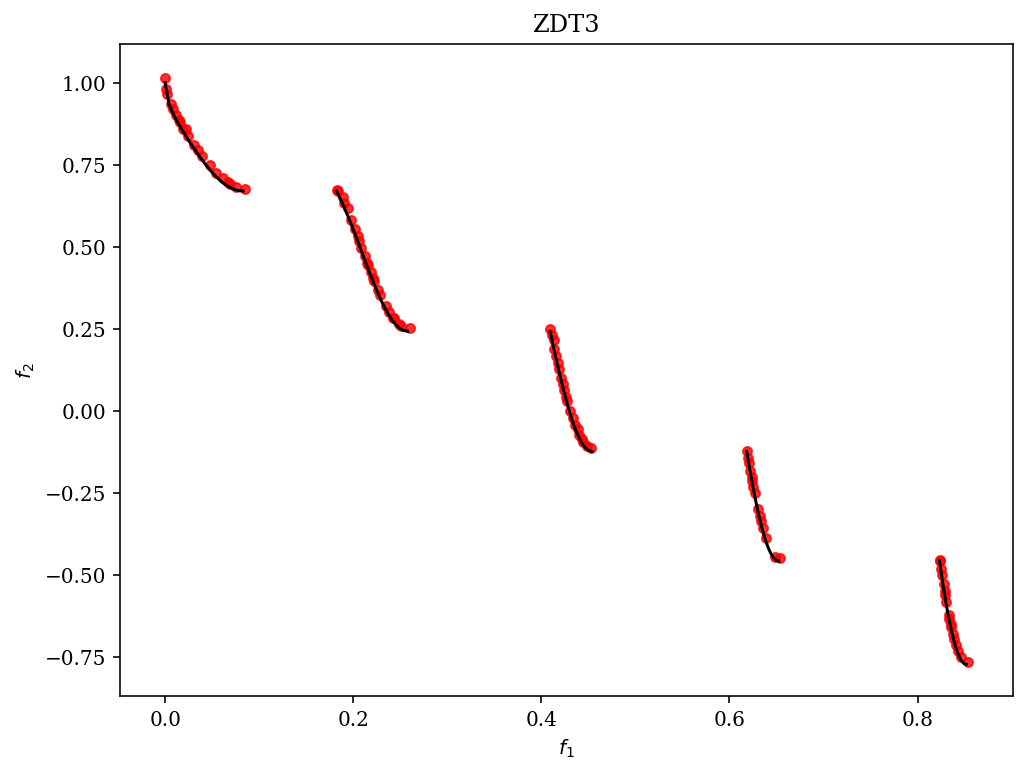

In [4]:
from pymoo.algorithms.nsga2 import nsga2
from pymoo.factory import get_problem, get_termination, get_algorithm
from pymoo.optimize import minimize
from pymoo.visualization.scatter import scatter

problem = get_problem("zdt3")
algorithm = nsga2(pop_size=100)
termination = get_termination("ftol", tol=0.001, n_last=20, n_max_gen=1000, nth_gen=10)

res = minimize(problem,
               algorithm,
               termination=termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=False)

print(algorithm.n_gen)
plot = scatter(title="ZDT3")
plot.add(problem.pareto_front(use_cache=False, flatten=False), plot_type="line", color="black")
plot.add(res.F, color="red", alpha=0.8, s=20)
plot.show()
